# Calling Libraries and Tools

In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import string #using it to set the alphabet set as labels
import pandas as pd

# Loading and Dividing Data

In [25]:
transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = torchvision.datasets.MNIST(root='./train', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./test', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)
add_rotation = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize([0.5], [0.5]),transforms.RandomRotation(45)])
testset_rotation = torchvision.datasets.MNIST(root='./test', train=False,
                                       download=True, transform=add_rotation)
testloader_rotation = torch.utils.data.DataLoader(testset_rotation, batch_size=8,
                                         shuffle=False)

classes =tuple(sorted(string.digits))
print(classes)

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


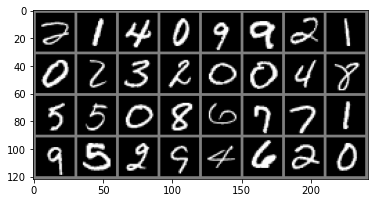

    2     1     4     0     9     9     2     1


    0     2     3     2     0     0     4     8


    5     5     0     8     6     7     7     1


    9     5     2     9     4     6     2     0




In [14]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
inc=0
for i in range(4):
    print(' '.join('%5s' % classes[labels[j]] for j in range(inc,8+inc)))
    print('\n')
    inc+=8
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



# CNN Model

In [4]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y


net = Net()
print(net)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# net.to(device)
net.cuda()
# print(net.conv1.bias.get_device())
print(torch.cuda.get_device_name(0))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu5): ReLU()
)
cuda:0
NVIDIA GeForce RTX 3060 Ti


# Training 

progress done: epoch number 1 average loss: 2.27
progress done: epoch number 2 average loss: 0.87
progress done: epoch number 3 average loss: 0.22
progress done: epoch number 4 average loss: 0.14
progress done: epoch number 5 average loss: 0.11
progress done: epoch number 6 average loss: 0.1
progress done: epoch number 7 average loss: 0.08
progress done: epoch number 8 average loss: 0.08
progress done: epoch number 9 average loss: 0.07
progress done: epoch number 10 average loss: 0.06
progress done: epoch number 11 average loss: 0.06
progress done: epoch number 12 average loss: 0.06
progress done: epoch number 13 average loss: 0.05
progress done: epoch number 14 average loss: 0.05
progress done: epoch number 15 average loss: 0.05
progress done: epoch number 16 average loss: 0.04
progress done: epoch number 17 average loss: 0.04
progress done: epoch number 18 average loss: 0.04
progress done: epoch number 19 average loss: 0.04
progress done: epoch number 20 average loss: 0.04
progress d

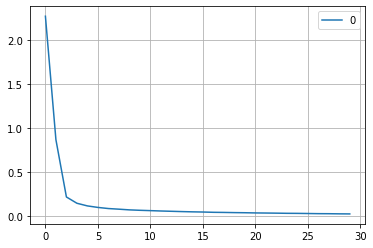

In [5]:
epoch_num = 30
average_loss=[]
for epoch in range(epoch_num): 
    epoch_loss = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #  statistics
        epoch_loss.append(loss.item())

    average_loss.append(sum(epoch_loss)/len(epoch_loss))
    print("progress done: epoch number",epoch+1,'average loss:',round(average_loss[-1],2))
#     print(net.conv1.bias.get_device())
df = pd.DataFrame(average_loss)
df_plot = df.plot(kind='line',grid=True).get_figure()

print('Training Done')

In [15]:
PATH = './mnst.pth'
torch.save(net.state_dict(), PATH)

# Load Testing Data

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))
dataiter = iter(testloader)

# Initial test

In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the' ,len(testloader), 'test images:',100 * correct / total,'%')

Accuracy of the network on the 1250 test images: 98.78 %


In [19]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 97 %
Accuracy of     4 : 99 %
Accuracy of     5 : 96 %
Accuracy of     6 : 99 %
Accuracy of     7 : 98 %
Accuracy of     8 : 98 %
Accuracy of     9 : 98 %


# Test With Slightly Rotated Images

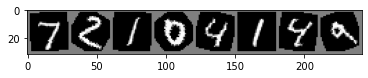

    7     2     1     0     4     1     4     9
Accuracy of the network on the 1250 test images: 85.25 %
Accuracy of     0 : 98 %
Accuracy of     1 : 90 %
Accuracy of     2 : 83 %
Accuracy of     3 : 77 %
Accuracy of     4 : 76 %
Accuracy of     5 : 86 %
Accuracy of     6 : 88 %
Accuracy of     7 : 72 %
Accuracy of     8 : 82 %
Accuracy of     9 : 90 %


In [28]:

dataiter = iter(testloader_rotation)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
inc=0
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader_rotation:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the' ,len(testloader_rotation), 'test images:',100 * correct / total,'%')
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader_rotation:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))